In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("flat_houses_v4.csv")

In [ ]:
df.head(2)

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,PRICE,PRICE_SQFT,PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
0,G71293060,flat,Central Delhi,Karol Bagh,Freehold,6.0,0,NaN,NaN,NaN,1.0,32.0,28.657811,77.19466,Under Construction,103000000,32461,10.3,3173.038415,3526.000000,Under Construction,Basic,0,Unity Group The Amaryllis
1,Y71293054,flat,Central Delhi,Karol Bagh,Freehold,5.0,6,NaN,NaN,NaN,1.0,32.0,28.657811,77.19466,Under Construction,102983146,32461,10.3,3172.519208,3172.519208,Under Construction,Basic,0,Unity Group The Amaryllis


In [ ]:
df.columns

Index(['PROP_ID', 'PROPERTY_TYPE', 'CITY_NAME', 'LOCALITY_NAME', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING',
       'FLOOR_NUM', 'TOTAL_FLOOR', 'LATITUDE', 'LONGITUDE', 'AVAILABILITY',
       'PRICE', 'PRICE_SQFT', 'PRICE_CR', 'AREA_SQFT', 'CALCULATED_AREA_SQFT',
       'AGE_POSSESSION', 'AMENITIES_CLUSTER', 'LUXURY_SCORE', 'PROP_NAME'],
      dtype='object')

# Property Type vs Price

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE_CR'>

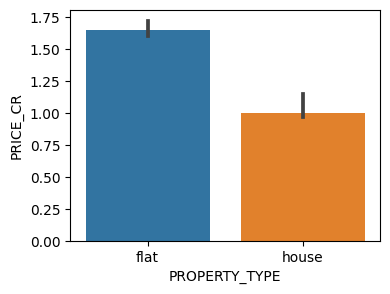

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x= df["PROPERTY_TYPE"], y = df["PRICE_CR"], estimator = np.median)

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE_CR'>

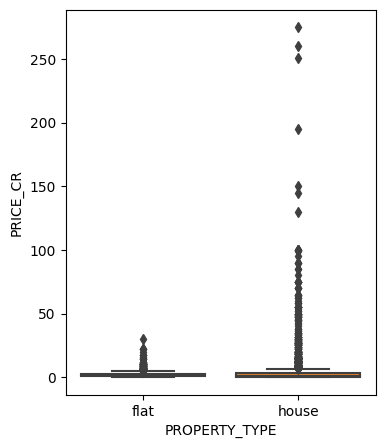

In [ ]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(x = df['PROPERTY_TYPE'], y = df['PRICE_CR'])

# Property Type vs area

<Axes: xlabel='PROPERTY_TYPE', ylabel='CALCULATED_AREA_SQFT'>

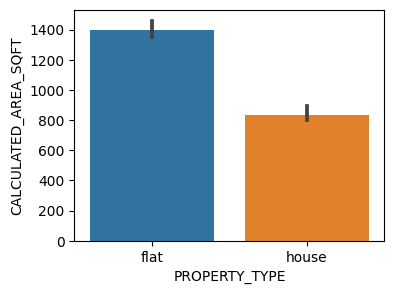

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x= df["PROPERTY_TYPE"], y = df["CALCULATED_AREA_SQFT"], estimator = np.median)

<Axes: xlabel='PROPERTY_TYPE', ylabel='CALCULATED_AREA_SQFT'>

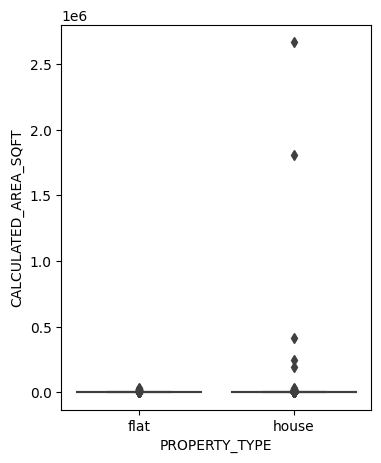

In [ ]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(x = df['PROPERTY_TYPE'], y = df['CALCULATED_AREA_SQFT'])

# Property Type vs PRICE_SQFT

<Axes: xlabel='PROPERTY_TYPE', ylabel='PRICE_SQFT'>

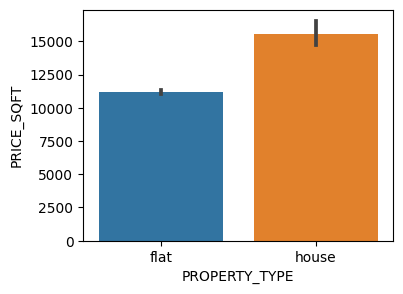

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x= df["PROPERTY_TYPE"], y = df["PRICE_SQFT"], estimator = np.median)

Observation: Median Price of house is less than flats in our dataset but price/sqft of house is greater than flat price/sqft.

In [ ]:
# check outliers
df[df['PRICE_SQFT'] > 100000][['PROPERTY_TYPE','LOCALITY_NAME','PROP_NAME','PRICE_CR','PRICE_SQFT','CALCULATED_AREA_SQFT']]

# Property Type vs Bedroom

<Axes: xlabel='BEDROOM_NUM', ylabel='PROPERTY_TYPE'>

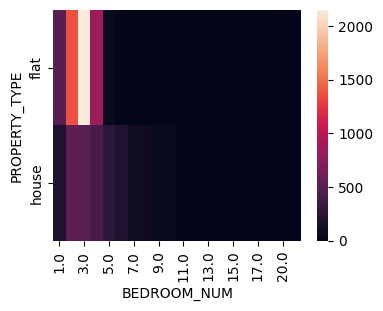

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(pd.crosstab(df['PROPERTY_TYPE'], df["BEDROOM_NUM"]))

In [ ]:
df[(df["BEDROOM_NUM"] >= 10 ) & (df["PROPERTY_TYPE"] == "flat")]

,PROP_ID,PROPERTY_TYPE,CITY_NAME,LOCALITY_NAME,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,FLOOR_NUM,TOTAL_FLOOR,LATITUDE,LONGITUDE,AVAILABILITY,PRICE,PRICE_SQFT,PRICE_CR,AREA_SQFT,CALCULATED_AREA_SQFT,AGE_POSSESSION,AMENITIES_CLUSTER,LUXURY_SCORE,PROP_NAME
4101,Z70125782,flat,South Delhi,Greater Kailash 2,Freehold,10.0,12,4.0,Unfurnished,East,8.0,8.0,28.537701,77.244651,Ready to move,300000000,15000,30.0,20000.0,20000.0,New Property,High-End,169,DLF Queens Court


In [ ]:
df[(df["BEDROOM_NUM"] >= 10 )].shape

(117, 24)

flats generally have 2-4 bedrooms.
There is only one flat in our dataset which has 10 bedrooms and its price is 30 crores.

<Axes: xlabel='AGE_POSSESSION', ylabel='PROPERTY_TYPE'>

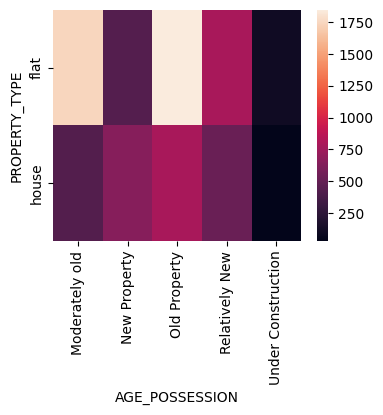

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
sns.heatmap(pd.crosstab(df["PROPERTY_TYPE"], df["AGE_POSSESSION"]))

<Axes: xlabel='AGE_POSSESSION', ylabel='PROPERTY_TYPE'>

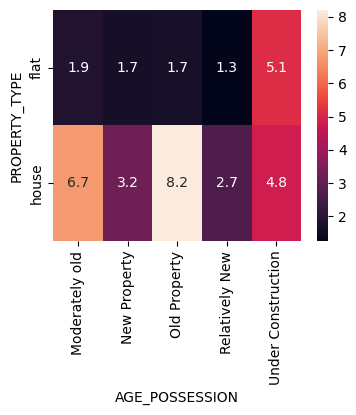

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
sns.heatmap(pd.pivot_table(df, index = "PROPERTY_TYPE", columns = 'AGE_POSSESSION', values = 'PRICE_CR', aggfunc = 'mean'), annot = True)

<Axes: xlabel='BEDROOM_NUM', ylabel='PROPERTY_TYPE'>

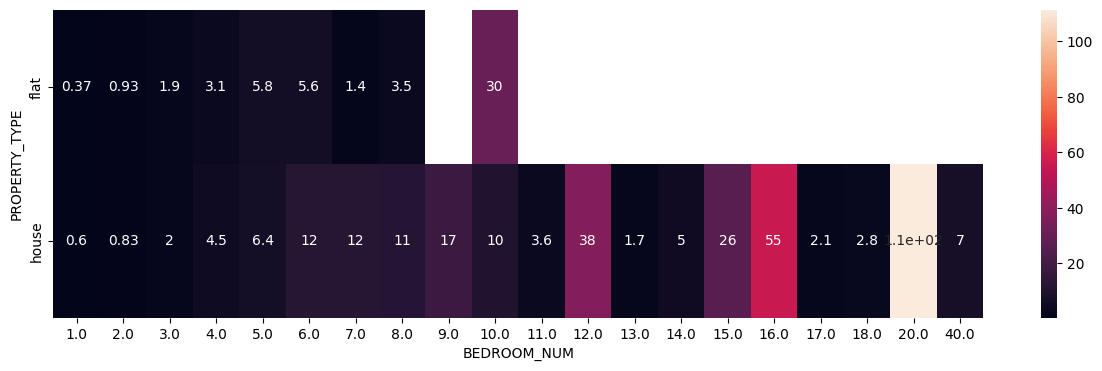

In [ ]:
fig, ax = plt.subplots(figsize = (15,4))
sns.heatmap(pd.pivot_table(df, index = "PROPERTY_TYPE", columns = 'BEDROOM_NUM', values = 'PRICE_CR', aggfunc = 'mean'), annot = True)

<Axes: xlabel='FURNISH', ylabel='PROPERTY_TYPE'>

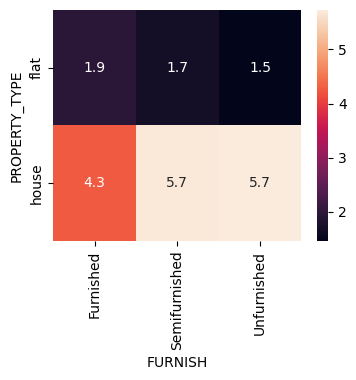

In [ ]:
fig, ax = plt.subplots(figsize = (4,3))
sns.heatmap(pd.pivot_table(df, index = "PROPERTY_TYPE", columns = 'FURNISH', values = 'PRICE_CR', aggfunc = 'mean'), annot = True)

<Axes: xlabel='PROPERTY_TYPE', ylabel='LUXURY_SCORE'>

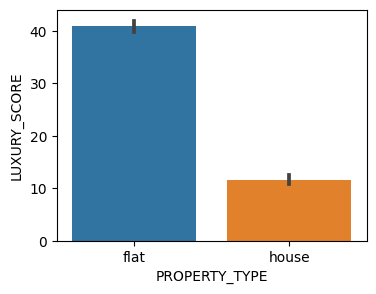

In [ ]:
plt.figure(figsize = (4,3))
sns.barplot(x = df['PROPERTY_TYPE'], y = df['LUXURY_SCORE'])

# Locality Analysis

In [ ]:
df["PRICE_CR"].quantile([0.95])

0.95    8.0
Name: PRICE_CR, dtype: float64

In [ ]:
df[df['PRICE_CR'] > 10].shape

(291, 24)

In [ ]:
df1 = df[df['PRICE_CR'] < 10]

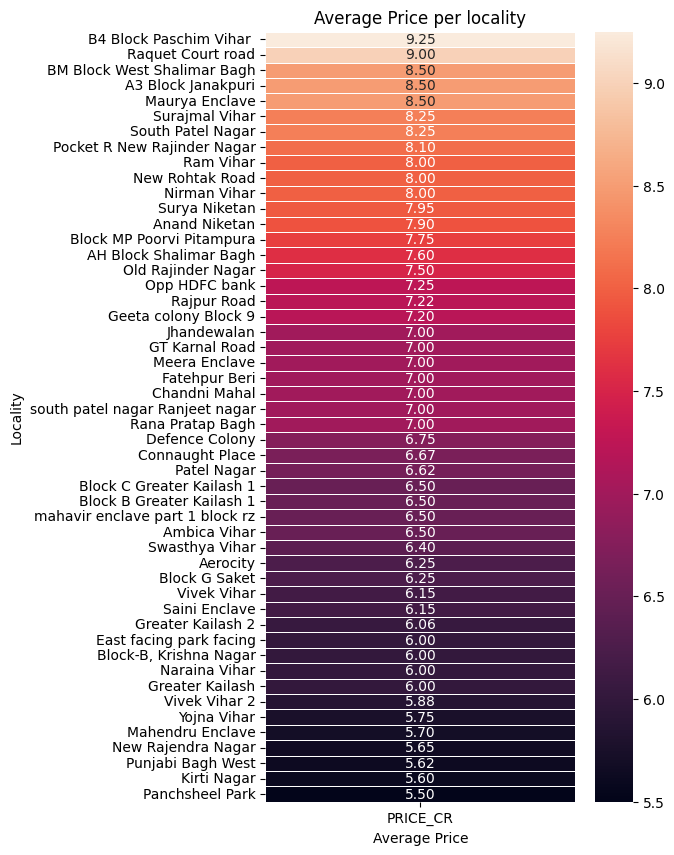

In [ ]:

avg_price_per_locality = df1.groupby('LOCALITY_NAME')['PRICE_CR'].mean().reset_index()
top_50_locality = avg_price_per_locality.sort_values(by = 'PRICE_CR', ascending = False).head(50)
plt.figure(figsize=(5, 10))
sns.heatmap(top_50_locality.set_index('LOCALITY_NAME')[['PRICE_CR']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per locality')
plt.xlabel('Average Price')
plt.ylabel('Locality')
plt.show()

In [ ]:
df["PRICE_SQFT"].quantile([0.95])

0.95    71107.4
Name: PRICE_SQFT, dtype: float64

In [ ]:
df1 = df[df["PRICE_SQFT"] < 71107.4]

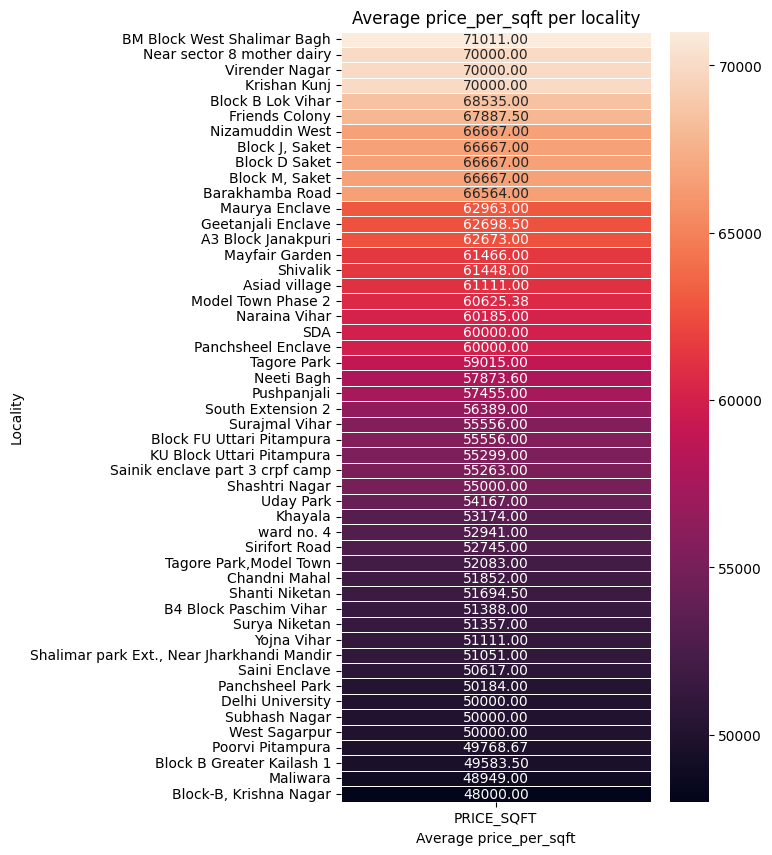

In [ ]:
avg_price_sqft_per_locality = df1.groupby('LOCALITY_NAME')['PRICE_SQFT'].mean().reset_index()
top_50_locality = avg_price_sqft_per_locality.sort_values(by = 'PRICE_SQFT', ascending = False).head(50)
plt.figure(figsize=(5, 10))
sns.heatmap(top_50_locality.set_index('LOCALITY_NAME')[['PRICE_SQFT']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average price_per_sqft per locality')
plt.xlabel('Average price_per_sqft')
plt.ylabel('Locality')
plt.show()

# Price

<Axes: xlabel='AREA_SQFT', ylabel='PRICE_CR'>

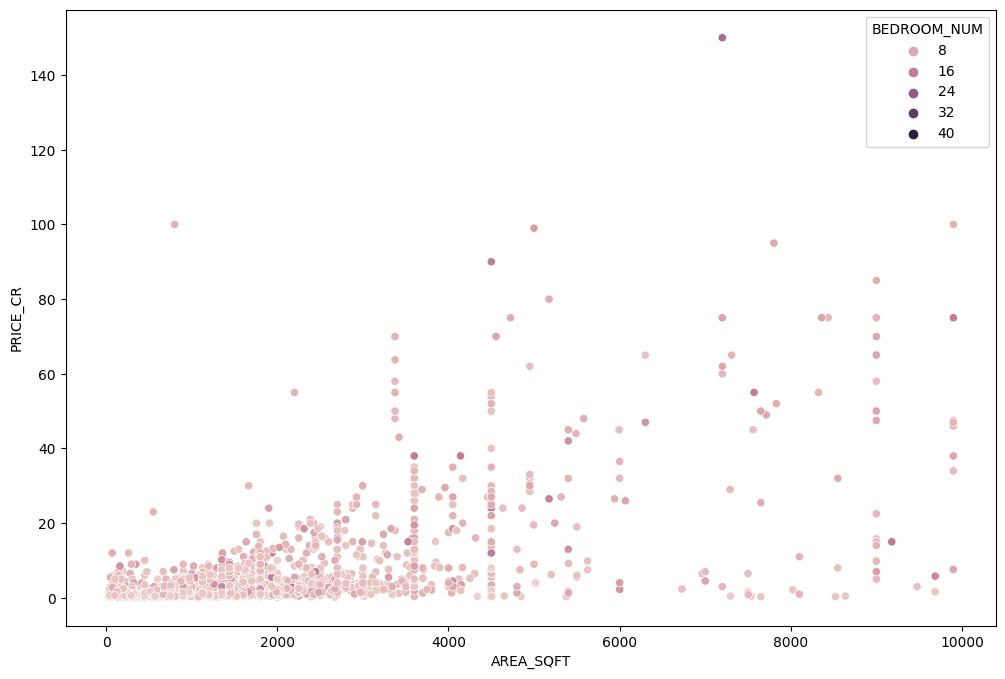

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df[df['AREA_SQFT'] < 10000], x='AREA_SQFT', y='PRICE_CR', hue='BEDROOM_NUM')


<Axes: xlabel='AREA_SQFT', ylabel='PRICE_CR'>

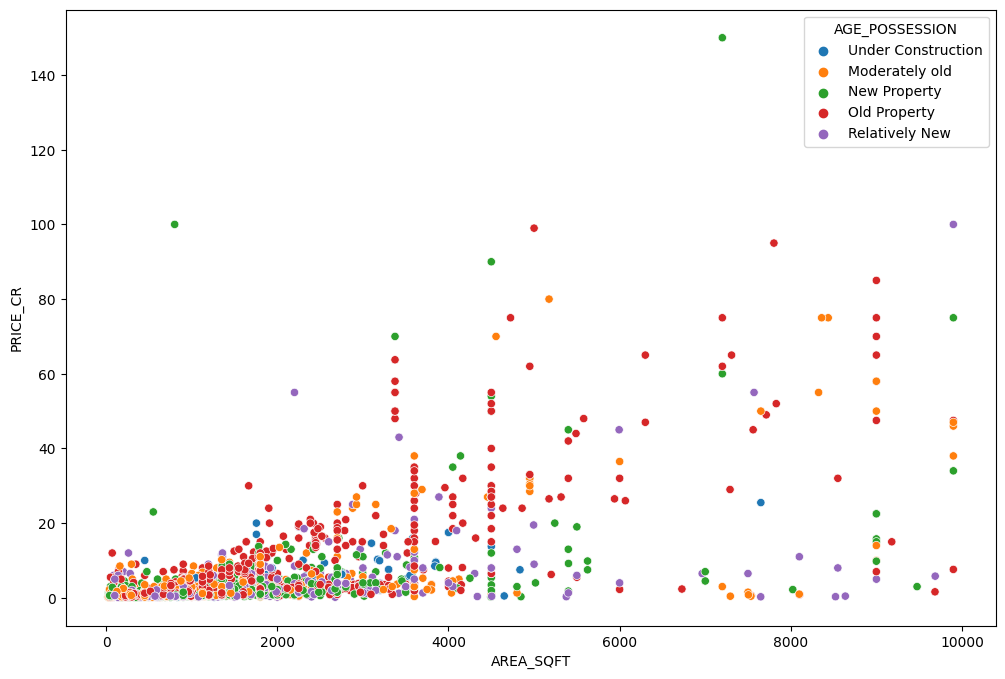

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df[df['AREA_SQFT'] < 10000], x='AREA_SQFT', y='PRICE_CR', hue='AGE_POSSESSION')


<Axes: xlabel='AREA_SQFT', ylabel='PRICE_CR'>

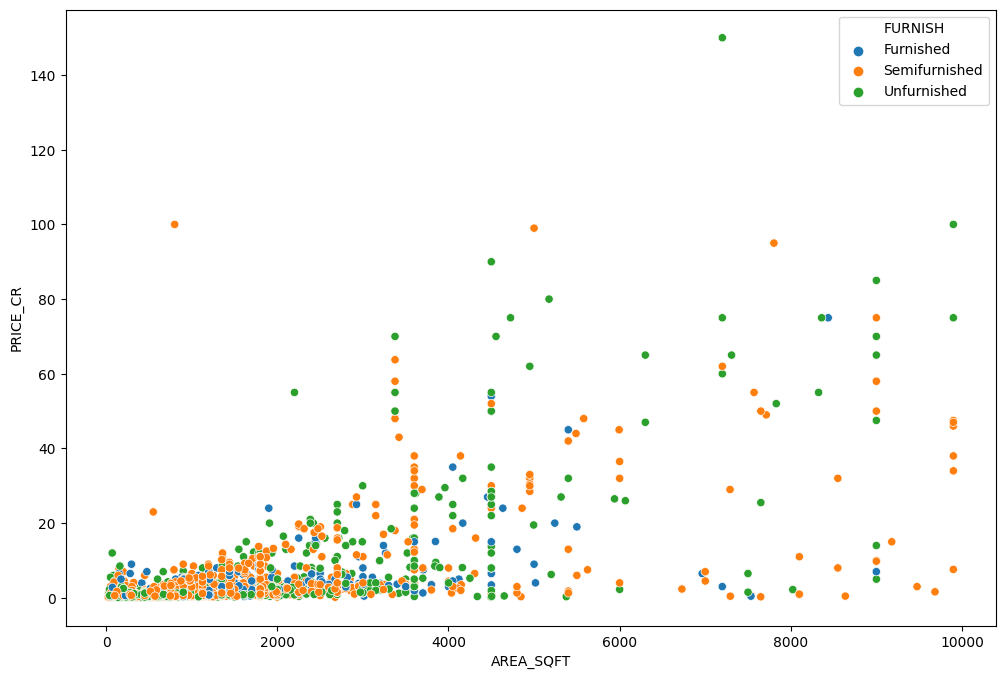

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=df[df['AREA_SQFT'] < 10000], x='AREA_SQFT', y='PRICE_CR', hue='FURNISH')


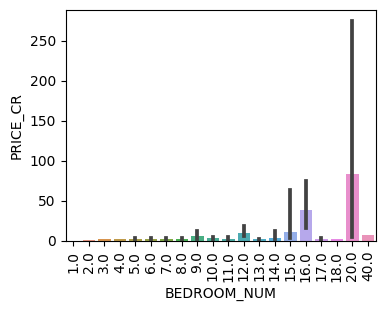

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df['BEDROOM_NUM'],y=df['PRICE_CR'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

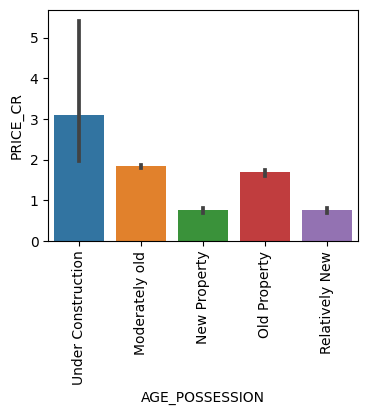

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df['AGE_POSSESSION'],y=df['PRICE_CR'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

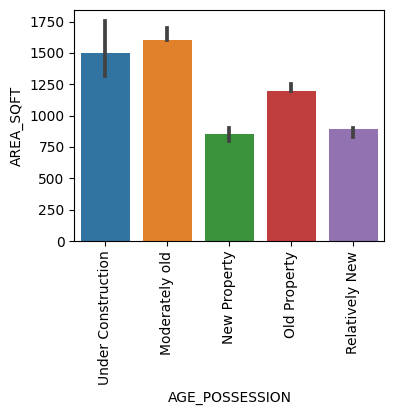

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df['AGE_POSSESSION'],y=df['AREA_SQFT'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

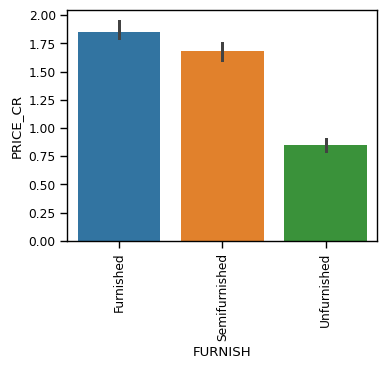

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.barplot(x=df['FURNISH'],y=df['PRICE_CR'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='LUXURY_SCORE', ylabel='PRICE_CR'>

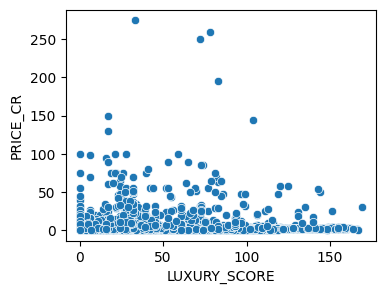

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))
sns.scatterplot(x=df['LUXURY_SCORE'],y=df['PRICE_CR'])

# Correlation

In [ ]:
df1 = df.drop(columns = ["LATITUDE", "LONGITUDE", "PRICE"])

<ipython-input-42-d5b88ed8b60d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr())


<Axes: >

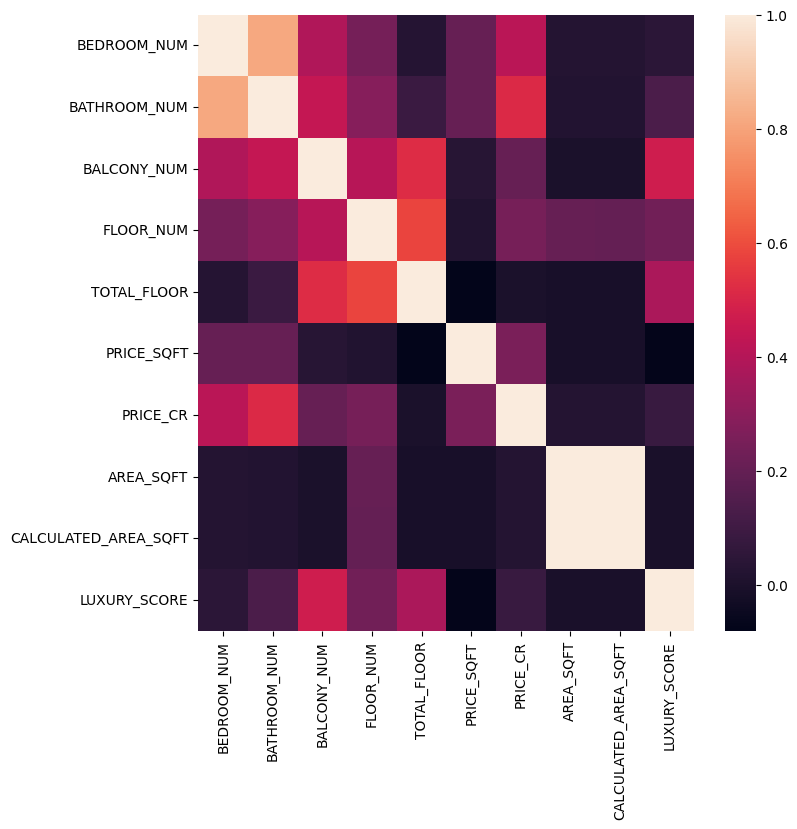

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df1.corr())

In [ ]:
df1.corr()['PRICE_CR'].sort_values(ascending=False)

<ipython-input-43-b4ac83dc43e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()['PRICE_CR'].sort_values(ascending=False)


PRICE_CR                1.000000
BATHROOM_NUM            0.512623
BEDROOM_NUM             0.416273
PRICE_SQFT              0.255706
FLOOR_NUM               0.247635
BALCONY_NUM             0.205881
LUXURY_SCORE            0.083452
AREA_SQFT               0.022029
CALCULATED_AREA_SQFT    0.021974
TOTAL_FLOOR            -0.001622
Name: PRICE_CR, dtype: float64

### Lot more analysis needed